<a href="https://colab.research.google.com/github/ancestor9/2025_Fall_text-image-deep-learning-with-python/blob/main/chapter05_fundamentals_of_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Third Edition](https://www.manning.com/books/deep-learning-with-python-third-edition). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

The book's contents are available online at [deeplearningwithpython.io](https://deeplearningwithpython.io).

In [ ]:
!pip install keras keras-hub --upgrade -q

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "jax"

In [ ]:
# @title
import os
from IPython.core.magic import register_cell_magic

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

## Fundamentals of machine learning

### Generalization: The goal of machine learning

#### Underfitting and overfitting

##### Noisy training data

##### Ambiguous features

##### Rare features and spurious correlations

- train_images_with_noise_channels: 원본 데이터에 무작위 노이즈가 추가되어, 모델이 잡음에 대한 민감도를 시험
- train_images_with_zeros_channels: 원본 데이터에 0으로 채워진 채널이 추가되어, 모델이 불필요한 차원을 무시하는 능력을 테스트
공통점: 두 배열 모두 원본 (60000, 784) 데이터를 (60000, 1568)로 확장하며, 추가 채널의 역할의 차이

- Why?

>> . 노이즈 테스트: train_images_with_noise_channels를 사용해 신경망이 실세계의 잡음(예: 센서 노이즈, 데이터 손상)에 대해 얼마나 잘 견디는지 확인

>> 차원 확장 실험: train_images_with_zeros_channels를 사용해 모델이 불필요한 입력을 무시하며 학습하는지, 또는 과적합(overfitting)이 발생하는지 분석

In [18]:
from keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1
)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1
)

In [19]:
train_images_with_noise_channels.shape

(60000, 1568)

In [20]:
train_images_with_zeros_channels.shape

(60000, 1568)

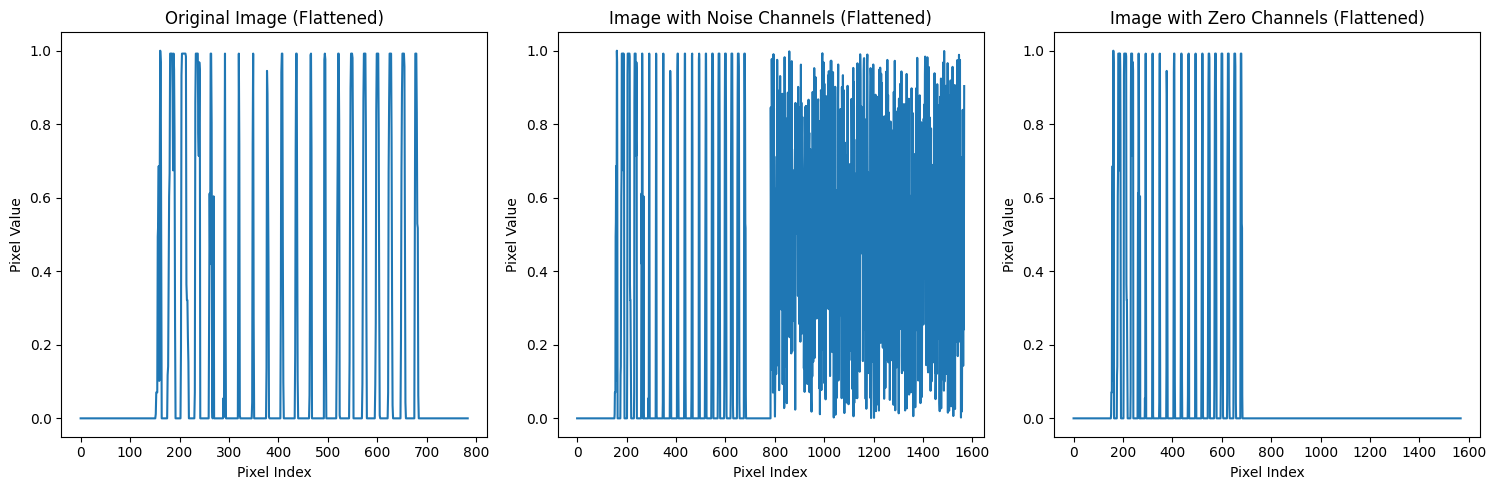

In [22]:
import matplotlib.pyplot as plt

# Display the full flattened arrays as 1D plots
image_original_flat = train_images[0]
image_noise_flat = train_images_with_noise_channels[0]
image_zeros_flat = train_images_with_zeros_channels[0]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(image_original_flat)
plt.title('Original Image (Flattened)')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Value')


plt.subplot(1, 3, 2)
plt.plot(image_noise_flat)
plt.title('Image with Noise Channels (Flattened)')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Value')

plt.subplot(1, 3, 3)
plt.plot(image_zeros_flat)
plt.title('Image with Zero Channels (Flattened)')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Value')

plt.tight_layout()
plt.show()

In [23]:
import keras
from keras import layers

def get_model():
    model = keras.Sequential(
        [
            layers.Dense(512, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)


model = get_model()
history_original = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7790 - loss: 0.7196 - val_accuracy: 0.9162 - val_loss: 0.2808
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9283 - loss: 0.2422 - val_accuracy: 0.9408 - val_loss: 0.2064
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9521 - loss: 0.1635 - val_accuracy: 0.9512 - val_loss: 0.1624
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9673 - loss: 0.1108 - val_accuracy: 0.9539 - val_loss: 0.1530
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9768 - loss: 0.0796 - val_accuracy: 0.9612 - val_loss: 0.1284
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9854 - loss: 0.0548 - val_accuracy: 0.9597 - val_loss: 0.1332
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9897 - loss: 0.0382 - val_accuracy: 0.9591 - val_loss: 0.1389
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9930 - loss: 0.0279 - val_accuracy: 0.

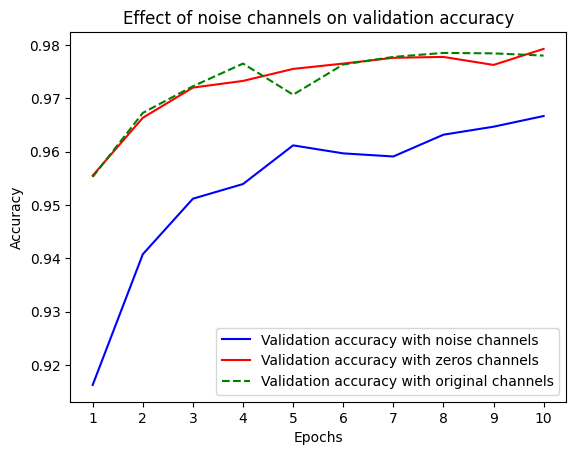

In [27]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]

epochs = range(1, 11)
plt.plot(
    epochs,
    val_acc_noise,
    "b-",
    label="Validation accuracy with noise channels",
)
plt.plot(
    epochs,
    val_acc_zeros,
    "r-",
    label="Validation accuracy with zeros channels",
)

plt.plot(
    epochs,
    val_acc_original,
    "g--",
    label="Validation accuracy with original channels",
)

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### The nature of generalization in deep learning
- labels를 무작위로 shuffling하여 fit하여 생각해 보자

In [34]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# 원래 레이블
print(train_labels)

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

# shuffled 레이블
print(train_labels)

[5 0 4 ... 5 6 8]
[0 5 3 ... 7 9 0]


In [36]:
model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    train_images,
    random_train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1020 - loss: 2.3337 - val_accuracy: 0.1071 - val_loss: 2.3045
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1169 - loss: 2.2980 - val_accuracy: 0.1059 - val_loss: 2.3084
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1241 - loss: 2.2906 - val_accuracy: 0.1090 - val_loss: 2.3159
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1408 - loss: 2.2760 - val_accuracy: 0.1052 - val_loss: 2.3225
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1547 - loss: 2.2592 - val_accuracy: 0.1020 - val_loss: 2.3306
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1701 - loss: 2.2401 - val_accuracy: 0.0996 - val_loss: 2.3487
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1835 - loss: 2.2200 - val_accuracy: 0.0993 - val_loss: 2.3646
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2002 - loss: 2.1914 - val_accu

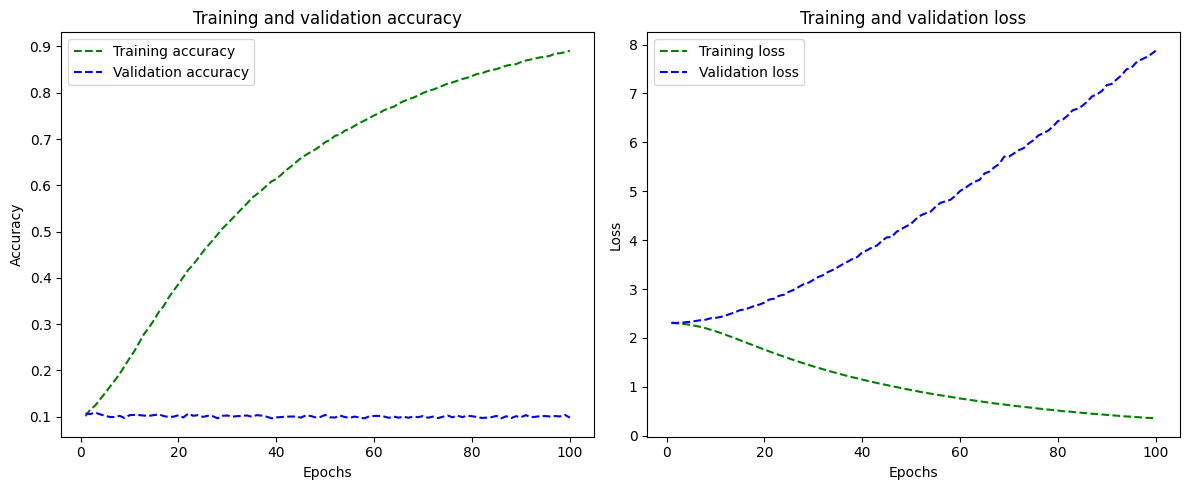

In [41]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, "g--", label="Training accuracy")
plt.plot(epochs, val_acc, "b--", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "g--", label="Training loss")
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

##### The manifold hypothesis

##### Interpolation as a source of generalization

##### Why deep learning works

##### Training data is paramount

### Evaluating machine-learning models

#### Training, validation, and test sets

##### Simple hold-out validation

##### K-fold validation

##### Iterated K-fold validation with shuffling

#### Beating a common-sense baseline

#### Things to keep in mind about model evaluation

### Improving model fit

#### Tuning key gradient descent parameters

In [42]:
# 학습률이 너무 높아 learning 이 안됨

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1.0),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4320 - loss: 3565.4265 - val_accuracy: 0.2121 - val_loss: 2.2916
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2014 - loss: 3.2911 - val_accuracy: 0.2037 - val_loss: 2.2987
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1815 - loss: 2.8566 - val_accuracy: 0.1883 - val_loss: 2.2035
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1875 - loss: 2.5090 - val_accuracy: 0.1634 - val_loss: 2.2918
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1619 - loss: 2.3507 - val_accuracy: 0.1383 - val_loss: 2.3703
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1764 - loss: 2.4326 - val_accuracy: 0.1877 - val_loss: 2.3263
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1846 - loss: 2.4569 - val_accuracy: 0.1833 - val_loss: 2.1490
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1837 - loss: 2.3428 - val_accuracy:

In [43]:
# 적당한 학습률로 good learning.
model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-2),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8300 - loss: 0.9349 - val_accuracy: 0.9540 - val_loss: 0.1643
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9628 - loss: 0.1296 - val_accuracy: 0.9678 - val_loss: 0.1283
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9745 - loss: 0.0906 - val_accuracy: 0.9693 - val_loss: 0.1431
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0712 - val_accuracy: 0.9733 - val_loss: 0.1384
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0606 - val_accuracy: 0.9670 - val_loss: 0.1785
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9861 - loss: 0.0561 - val_accuracy: 0.9729 - val_loss: 0.1596
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9875 - loss: 0.0470 - val_accuracy: 0.9707 - val_loss: 0.1994
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9904 - loss: 0.0398 - val_accuracy: 0.

#### Using better architecture priors

#### Increasing model capacity

In [44]:

model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history_small_model = model.fit(
    train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7509 - loss: 1.0128 - val_accuracy: 0.9046 - val_loss: 0.3602
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8988 - loss: 0.3698 - val_accuracy: 0.9162 - val_loss: 0.3091
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9085 - loss: 0.3272 - val_accuracy: 0.9190 - val_loss: 0.2916
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9161 - loss: 0.2992 - val_accuracy: 0.9211 - val_loss: 0.2854
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9177 - loss: 0.2937 - val_accuracy: 0.9230 - val_loss: 0.2800
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9199 - loss: 0.2843 - val_accuracy: 0.9228 - val_loss: 0.2759
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9221 - loss: 0.2800 - val_accuracy: 0.9260 - val_loss: 0.2707
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9224 - loss: 0.2738 - val_accuracy: 0.

In [46]:
history_small_model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

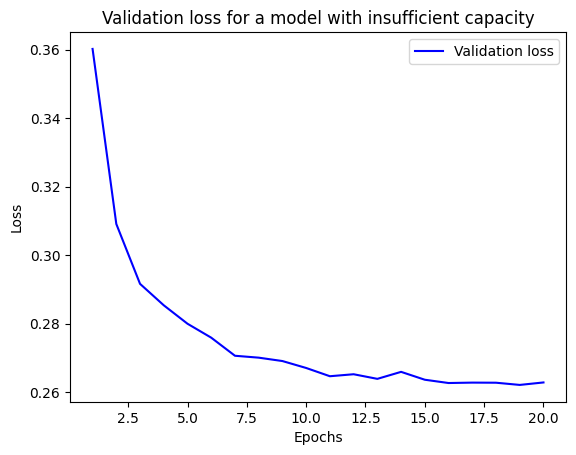

In [48]:
import matplotlib.pyplot as plt

val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-", label="Validation loss")
plt.title("Validation loss for a model with insufficient capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [49]:
model = keras.Sequential(
    [
        layers.Dense(128, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history_large_model = model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8305 - loss: 0.5947 - val_accuracy: 0.9484 - val_loss: 0.1788
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9512 - loss: 0.1638 - val_accuracy: 0.9572 - val_loss: 0.1394
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9683 - loss: 0.1055 - val_accuracy: 0.9689 - val_loss: 0.1017
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9773 - loss: 0.0753 - val_accuracy: 0.9720 - val_loss: 0.0910
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9832 - loss: 0.0557 - val_accuracy: 0.9717 - val_loss: 0.0951
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9874 - loss: 0.0438 - val_accuracy: 0.9745 - val_loss: 0.0969
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9887 - loss: 0.0366 - val_accuracy: 0.9741 - val_loss: 0.0954
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9913 - loss: 0.0292 - val_accuracy: 0.

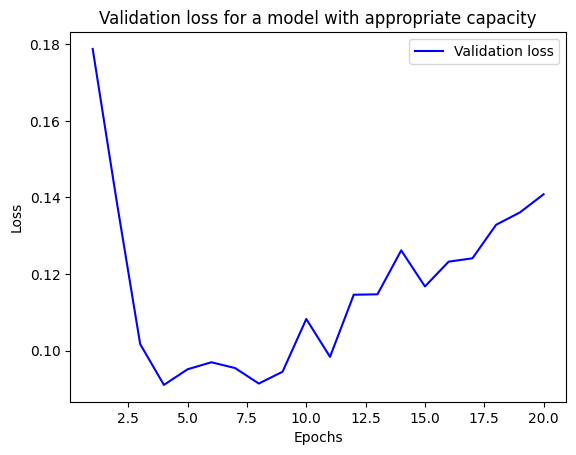

In [50]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-", label="Validation loss")
plt.title("Validation loss for a model with appropriate capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [51]:
model = keras.Sequential(
    [
        layers.Dense(2048, activation="relu"),
        layers.Dense(2048, activation="relu"),
        layers.Dense(2048, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history_very_large_model = model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8664 - loss: 0.4608 - val_accuracy: 0.9614 - val_loss: 0.1392
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9695 - loss: 0.1142 - val_accuracy: 0.9667 - val_loss: 0.1424
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9792 - loss: 0.0810 - val_accuracy: 0.9743 - val_loss: 0.1302
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9845 - loss: 0.0601 - val_accuracy: 0.9756 - val_loss: 0.1170
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9882 - loss: 0.0478 - val_accuracy: 0.9707 - val_loss: 0.1793
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9903 - loss: 0.0411 - val_accuracy: 0.9796 - val_loss: 0.1498
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9921 - loss: 0.0321 - val_accuracy: 0.9723 - val_loss: 0.1858
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9927 - loss: 0.0294 

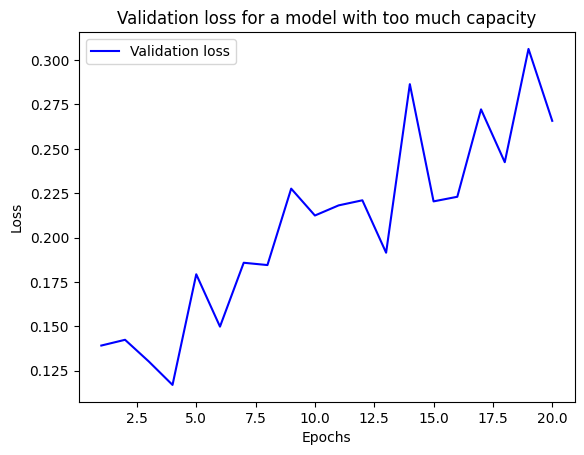

In [52]:
val_loss = history_very_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-", label="Validation loss")
plt.title("Validation loss for a model with too much capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

| 모델 | 약점 | 결과의 이유 | 해결 방안 |
|------|------|-------------|-----------|
| **모델 1: 단일 Dense 레이어 (10 단위)** | 과소적합 (높은 편향): 모델이 데이터의 기본 패턴을 포착하지 못해 검증 손실이 일정하게 높고 개선 없이 평형을 이룸 | 용량 부족; 약 7,850개의 파라미터(784 입력 * 10 출력)로, MNIST의 다양한 스타일(예: 다른 손글씨 스타일)을 학습하기에는 너무 단순함. 복잡한 특징을 학습할 수 없어 손실이 천천히 감소하며 편향이 높아 최적 수준에서 안정화됨 | 모델 용량을 늘리기 위해 숨겨진 레이어를 추가하거나 단위 수를 늘림 (예: 레이어당 64-128 단위). 배치 정규화(batch normalization)를 사용해 수렴을 돕거나, CNN 구조로 전환 |
| **모델 2: 두 Dense 레이어 (각 128 단위)** | 특정 지점 이후 약간의 오버피팅: 초기 감소 후 손실이 변동하며 약간 증가(예: 에포크 7.5 이후). 에포크 증가 시 분산이 점차 나타나는 초기 징후 | 적절한 용량; 약 200,000개의 파라미터로 편향과 분산의 균형을 맞추며 주요 특징을 포착하되, 특정 지점에서 노이즈 학습 시작. 손실이 안정화되지 않고 약간 상승. 변동은 RMSprop 최적화 노이즈 및 검증 분할 변동성, 오버피팅 영향 | 조기 종료(early stopping)로 검증 손실 증가 시작 시 학습 중단. 약한 정규화(L2 weight decay=0.001)나 드롭아웃(10-20%) 추가 |
| **모델 3: 세 Dense 레이어 (각 2048 단위)** | 과적합 (높은 분산): 훈련 데이터에서는 잘 수행하나 검증 성능 저하. 초기 감소 후 손실이 증가하며 노이즈를 암기 | 용량 과다; 수백만 개 이상의 파라미터(~800만 개 이상)로 과도한 유연성을 가져 MNIST 픽셀 노이즈를 암기. 일반 패턴 학습 실패 → 검증 손실 상승. 작은 배치 크기(32)가 경사 변동성을 키움 | 정규화 적용: 드롭아웃(30-50%) 추가, L1/L2 정규화(kernel_regularizer=0.001), 검증 손실 기반 조기 종료. 배치 크기를 128로 늘리거나 데이터 증강(무작위 회전/이동) 활용. 레이어/단위 수를 데이터 복잡도에 맞게 축소 |


### Improving generalization

#### Dataset curation

#### Feature engineering

#### Using early stopping

#### Regularizing your model

##### Reducing the network's size

In [53]:
# 1. original model

from keras.datasets import imdb

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

train_data = vectorize_sequences(train_data)

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_original = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.6838 - loss: 0.6279 - val_accuracy: 0.8651 - val_loss: 0.4497
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8793 - loss: 0.4050 - val_accuracy: 0.8736 - val_loss: 0.3537
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9047 - loss: 0.2994 - val_accuracy: 0.8871 - val_loss: 0.3024
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9249 - loss: 0.2347 - val_accuracy: 0.8821 - val_loss: 0.2909
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9360 - loss: 0.1955 - val_accuracy: 0.8910 - val_loss: 0.2752
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9481 - loss: 0.1641 - val_accuracy: 0.8913 - val_loss: 0.2761
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9578 - loss: 0.1400 - val_accuracy: 0.8869 - val_loss: 0.2848
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accura

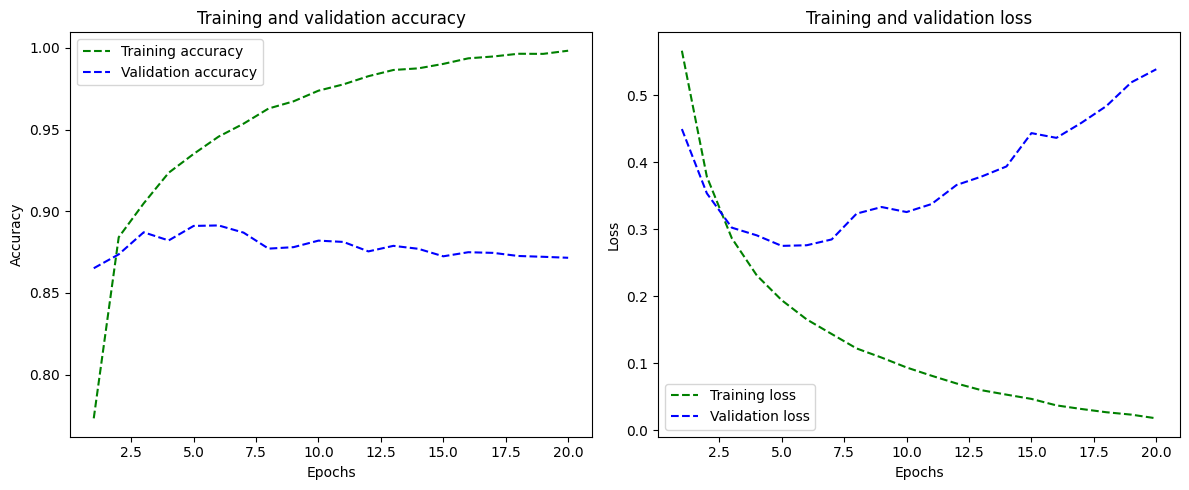

In [54]:
acc = history_original.history["accuracy"]
val_acc = history_original.history["val_accuracy"]
loss = history_original.history["loss"]
val_loss = history_original.history["val_loss"]
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, "g--", label="Training accuracy")
plt.plot(epochs, val_acc, "b--", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "g--", label="Training loss")
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [55]:
# 2. Version of the model with lower capacity

model = keras.Sequential(
    [
        layers.Dense(4, activation="relu"),
        layers.Dense(4, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_smaller_model = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.6734 - loss: 0.6420 - val_accuracy: 0.8525 - val_loss: 0.5243
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8683 - loss: 0.4868 - val_accuracy: 0.8699 - val_loss: 0.4339
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8990 - loss: 0.3898 - val_accuracy: 0.8798 - val_loss: 0.3743
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9126 - loss: 0.3201 - val_accuracy: 0.8836 - val_loss: 0.3340
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9239 - loss: 0.2732 - val_accuracy: 0.8876 - val_loss: 0.3115
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9336 - loss: 0.2405 - val_accuracy: 0.8887 - val_loss: 0.2968
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9379 - loss: 0.2109 - val_accuracy: 0.8909 - val_loss: 0.2819
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9453 - loss: 0.1896 - val_accuracy: 0.8917 - 

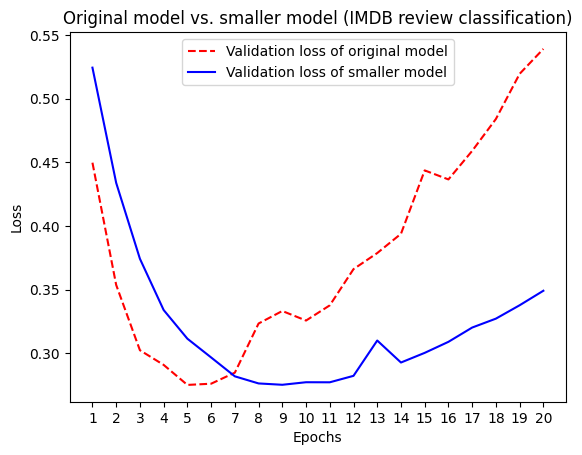

In [56]:
original_val_loss = history_original.history["val_loss"]
smaller_model_val_loss = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(
    epochs,
    original_val_loss,
    "r--",
    label="Validation loss of original model",
)
plt.plot(
    epochs,
    smaller_model_val_loss,
    "b-",
    label="Validation loss of smaller model",
)
plt.title("Original model vs. smaller model (IMDB review classification)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.show()

In [57]:
# 3. Version of the model with higher capacity

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_larger_model = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.6481 - loss: 0.6458 - val_accuracy: 0.8648 - val_loss: 0.3430
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8611 - loss: 0.3410 - val_accuracy: 0.8831 - val_loss: 0.2802
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8965 - loss: 0.2658 - val_accuracy: 0.8641 - val_loss: 0.3315
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9129 - loss: 0.2094 - val_accuracy: 0.8781 - val_loss: 0.2896
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9519 - loss: 0.1320 - val_accuracy: 0.8856 - val_loss: 0.2930
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9693 - loss: 0.0910 - val_accuracy: 0.8774 - val_loss: 0.3792
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9704 - loss: 0.0804 - val_accuracy: 0.8838 - val_loss: 0.3648
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9811 - loss: 0.0690 - val_accuracy: 0.8850 - v

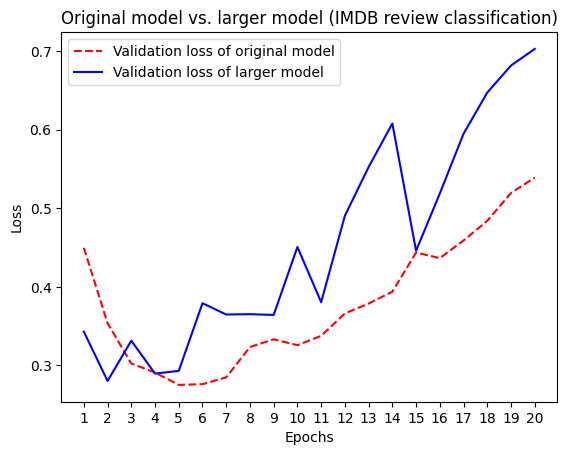

In [58]:
original_val_loss = history_original.history["val_loss"]
larger_model_val_loss = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(
    epochs,
    original_val_loss,
    "r--",
    label="Validation loss of original model",
)
plt.plot(
    epochs,
    larger_model_val_loss,
    "b-",
    label="Validation loss of larger model",
)
plt.title("Original model vs. larger model (IMDB review classification)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.show()

##### Adding weight regularization

In [59]:
# 1. Adding L2 weight regularization to the model

from keras.regularizers import l2

model = keras.Sequential(
    [
        layers.Dense(16, kernel_regularizer=l2(0.002), activation="relu"),
        layers.Dense(16, kernel_regularizer=l2(0.002), activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_l2_reg = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.6517 - loss: 0.7103 - val_accuracy: 0.8348 - val_loss: 0.5310
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8802 - loss: 0.4789 - val_accuracy: 0.8847 - val_loss: 0.4180
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9132 - loss: 0.3669 - val_accuracy: 0.8837 - val_loss: 0.3826
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9259 - loss: 0.3169 - val_accuracy: 0.8904 - val_loss: 0.3618
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9344 - loss: 0.2899 - val_accuracy: 0.8903 - val_loss: 0.3582
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9402 - loss: 0.2677 - val_accuracy: 0.8765 - val_loss: 0.3802
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9440 - loss: 0.2588 - val_accuracy: 0.8790 - val_loss: 0.3801
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9430 - loss: 0.2516 - val_accuracy: 0.8846 - v

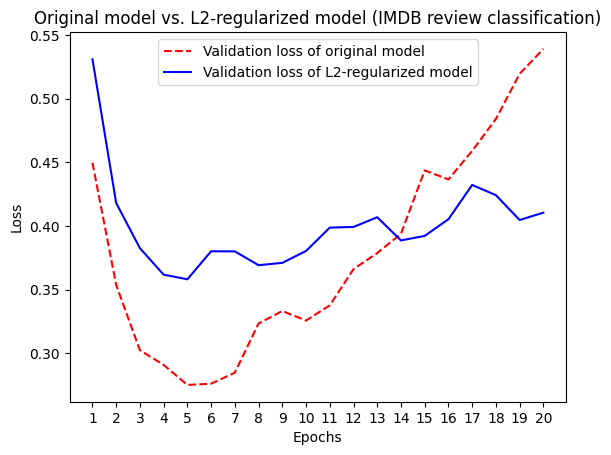

In [60]:
original_val_loss = history_original.history["val_loss"]
l2_val_loss = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(
    epochs,
    original_val_loss,
    "r--",
    label="Validation loss of original model",
)
plt.plot(
    epochs,
    l2_val_loss,
    "b-",
    label="Validation loss of L2-regularized model",
)
plt.title(
    "Original model vs. L2-regularized model (IMDB review classification)"
)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.show()

In [61]:
from keras import regularizers

regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

##### Adding dropout

In [62]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_dropout = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.5744 - loss: 0.6685 - val_accuracy: 0.7989 - val_loss: 0.5554
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7288 - loss: 0.5617 - val_accuracy: 0.8705 - val_loss: 0.4408
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8009 - loss: 0.4717 - val_accuracy: 0.8803 - val_loss: 0.3757
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8422 - loss: 0.4071 - val_accuracy: 0.8877 - val_loss: 0.3138
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8726 - loss: 0.3524 - val_accuracy: 0.8914 - val_loss: 0.2859
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8914 - loss: 0.3066 - val_accuracy: 0.8859 - val_loss: 0.2897
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9064 - loss: 0.2742 - val_accuracy: 0.8903 - val_loss: 0.2775
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9188 - loss: 0.2483 - val_accuracy: 0.8905 - 

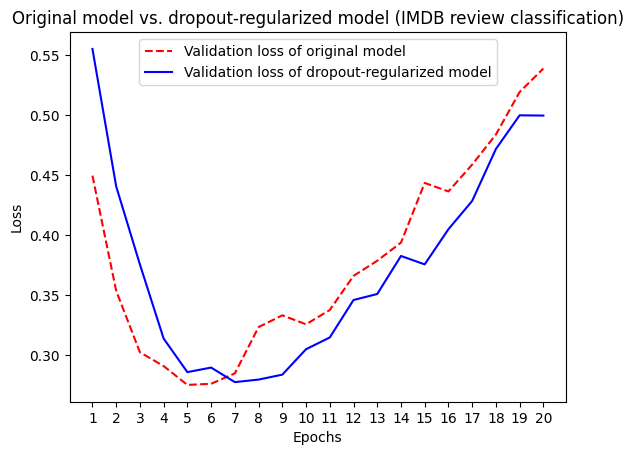

In [63]:
original_val_loss = history_original.history["val_loss"]
dropout_val_loss = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(
    epochs,
    original_val_loss,
    "r--",
    label="Validation loss of original model",
)
plt.plot(
    epochs,
    dropout_val_loss,
    "b-",
    label="Validation loss of dropout-regularized model",
)
plt.title(
    "Original model vs. dropout-regularized model (IMDB review classification)"
)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.show()